<a href="https://colab.research.google.com/github/danaSror/analyze-the-activities-of-party/blob/main/Analyze_the_activities_of_party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

üåü **Analyze the activities of party**  üåü
---


‚óΩ It is necessary to switch to a **GPU** in order to shorten the running times

‚óΩ After completing the installation step the notebook should be restart


# Installation

In [ ]:
!pip install afinn
!pip install turicreate
!pip install wordcloud
!pip install imageio
!pip install plotly_express
!pip install pyyaml==5.4.1
!pip install summarizers -q
!pip3 install snscrape
!pip install bertopic
!pip install GoogleNews
!pip install python-bidi
!pip install geopy
!pip install geopandas
!pip install imageio
!pip3 install imageai --upgrade

import nltk
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.0.4-cp37-cp37m-manylinux2010_x86_64.whl (86.4 MB)
  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached numba-0.55.2-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-0.55.1-1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-0.55.0-1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.3-cp37-cp37m-manylinux2010_x86_64.whl (14.9 MB)
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully u

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Analyzation**


---
I choose the **Likud** party and Member of the Knesset **Benjamin Netanyahu**.

The goal is to analyze the activities of the party and the Knesset member over the past year through social networks or articles.
But despite the attempts, the results seemed less satisfactory because of the "dirty" information structure of tweets. In addition, the tweets are in the Hebrew language and there are not enough models that are well trained in the Hebrew language.
After this attempt, I extracted news correspondence information using the Google API but got minimal information in terms of dates because it is a limited API.
But at the same time, the results seemed satisfactory and logical.

---
**My solution to the problem described is:**

***First attempt:***

1Ô∏è‚É£ Download tweets from Twitter for the last month (API is restricted and does not return results for older dates)

2Ô∏è‚É£ Identify issues using a BertTopic model

3Ô∏è‚É£ Visual presentation in different ways of the identified topics
After realizing that the results were less quality, I switched to the following experiment:

***Second attempt:***

1Ô∏è‚É£ Download articles from Google (limited in the number of repeated results)

2Ô∏è‚É£ Create an orderly DF of the returned results concerning the dates of the articles.

3Ô∏è‚É£ Training the information from the articles using BertTopic model for identifying topics

4Ô∏è‚É£ Present the events identified from the articles visually.

---


I will now present a prototype for solving the problem I presented in the previous section:


## Part 1 - 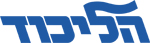



---
Data analysis for the elected party - Likud


### First approach - topic detection in Twitter using BertTopic

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from tqdm import tqdm

# Creating list to append tweet data to
tweets_list3 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('◊î◊ú◊ô◊õ◊ï◊ì since:2022-03-01 until:2022-07-06').get_items())):
    if i>25000:
        break
    tweets_list3.append([tweet.date, tweet.id, tweet.content])

# Creating a dataframe from the tweets list above
tweets_df3 = pd.DataFrame(tweets_list3, columns=['Datetime', 'Tweet Id', 'Text'])

25001it [06:46, 61.57it/s]


In [ ]:
tweets_df3 = tweets_df3.sort_values(by=['Datetime'])
tweets_df3

Datetime             Tweet Id  \
25000 2022-06-22 01:42:52+00:00  1539423644996231168   
24999 2022-06-22 01:52:11+00:00  1539425989960290304   
24998 2022-06-22 02:04:15+00:00  1539429026657443840   
24997 2022-06-22 02:07:15+00:00  1539429779719462912   
24996 2022-06-22 02:09:44+00:00  1539430406860193792   
...                         ...                  ...   
4     2022-07-05 23:28:26+00:00  1544463241568567296   
3     2022-07-05 23:28:51+00:00  1544463346740625409   
2     2022-07-05 23:39:37+00:00  1544466056948977664   
1     2022-07-05 23:49:23+00:00  1544468513665974274   
0     2022-07-05 23:53:15+00:00  1544469490100064263   

                                                    Text  
25000  @GalitDistel ◊í◊ú◊ô◊ô◊ô◊ô◊ô◊ô◊™ \n◊ê◊ô◊ñ◊ï ◊™◊°◊§◊ï◊®◊™ ◊û◊ì◊î◊ô◊û◊î !\...  
24999  @Ronen2022 @immediateres ◊ë◊®◊ï◊® ◊ë◊õ◊ú ◊û◊ß◊ï◊ù ◊ê◊™◊î ◊©◊ï◊û...  
24998                  @TamerAm48431889 ◊î◊ú◊ô◊õ◊ï◊ì ◊û◊ß◊ë◊ú 36 ◊ï  
24997  @habibistit @shlomo_karhi ◊®◊ï◊†◊ô◊™ ◊ê. ◊°◊†◊ô◊§◊ô ◊î◊ú◊ô◊õ◊ï...  
24996  @habibistit @shlomo_karhi ◊ë◊ñ◊û◊ü ◊ê◊û◊™ ◊î◊ï◊ê ◊†◊õ◊ó ◊©◊ù ...  
...                                                  ...  
4      @Nissim_Sofer ◊õ◊ü ◊ï◊ú◊ê\n\n◊ê. ◊ú◊û◊§◊ê◊ô ◊î◊ô◊™◊î ◊™◊ó◊ï◊©◊™ ◊ê◊ì...  
3      @abramovich_adi @bardugojacob ◊ô◊¢◊ß◊ë ◊ë◊®◊ì◊ï◊í◊ï ◊™◊ï◊û◊ö...  
2      @HottieBottie12 ◊õ◊ï◊ú◊ù ◊ô◊ï◊ì◊¢◊ô◊ù ◊ú◊û◊ô ◊û◊í◊ô◊¢ ◊î◊õ◊ë◊ï◊ì ! ◊î...  
1      ◊î◊ú◊ô◊õ◊ï◊ì ◊¢◊ü◊û◊ì ◊ú9◊™◊ï◊ó ◊û◊°◊¢ ◊î◊ë◊ó◊ô◊®◊ï◊™ ◊ë◊ó◊ï◊£ ◊ë◊™ ◊ô◊ù ◊ë◊û◊ü◊§◊¢...  
0      @Nadavbornstien \n◊ú◊ê ◊î◊ñ◊õ◊ô◊®◊ï ◊ê◊™ ◊°◊ô◊§◊ï◊® ◊î◊¢◊ì◊ï◊™ ◊©◊ú ...  

[25001 rows x 3 columns]

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="multilingual",top_n_words=20, calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(tweets_df3['Text'])

Downloading:   0%|          | 0.00/968 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/645 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/782 [00:00<?, ?it/s]

2022-07-07 08:46:05,123 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-07-07 08:46:51,374 - BERTopic - Reduced dimensionality
2022-07-07 08:47:30,175 - BERTopic - Clustered reduced embeddings


In [ ]:
topic_model.get_topic_info()

Topic  Count                             Name
0       -1  11241               -1_◊î◊ú◊ô◊õ◊ï◊ì_◊ê◊™_◊ú◊ê_◊©◊ú
1        0   1812                0_◊î◊ú◊ô◊õ◊ï◊ì_◊ú◊ê_◊ê◊™_◊©◊ú
2        1   1498                1_◊©◊ú_◊î◊ú◊ô◊õ◊ï◊ì_◊ú◊ê_◊ê◊™
3        2    999                2_◊î◊ú◊ô◊õ◊ï◊ì_◊ú◊ê_◊©◊ú_◊ê◊™
4        3    751                3_◊î◊ú◊ô◊õ◊ï◊ì_◊©◊ú_◊ê◊™_◊¢◊ú
..     ...    ...                              ...
152    151     10       151_◊û◊ï◊¶◊®_◊õ◊™◊£_1◊ú◊ô◊ï◊ú◊ô_◊ï◊ú◊ò◊ï◊ï◊ó
153    152     10         152_◊î◊ë◊®◊ô◊™_◊ë◊ê◊®◊¶◊ï◊™_◊ë◊ì◊ß_◊ß◊ë◊¢
154    153     10  153_◊ê◊ï◊§◊¶◊ô◊î_◊û◊í◊ô◊ë◊ô◊ù_◊û◊ë◊ô◊†◊ô◊ù_◊™◊ß◊ô◊§◊ô◊ù
155    154     10          154_◊ê◊ú◊ô◊ö_◊û◊®◊©◊ô◊û◊™_◊™◊ß◊®◊ê_◊©◊ë
156    155     10   155_◊ï◊î◊¢◊©◊ô◊ô◊î_◊ú◊†◊ß◊ï◊™_◊î◊ë◊®◊ï◊õ◊î_◊ú◊ó◊ô◊ô◊í

[157 rows x 3 columns]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [ ]:
topic_model.visualize_barchart(top_n_topics=25)

In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
import re

tweets_df4 = tweets_df3
tweets_df4.Text = tweets_df4.apply(lambda row: re.sub(r"http\S+", "", row.Text), 1)
tweets_df4.Text = tweets_df4.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Text.split())), 1)
timestamps = tweets_df4.Datetime.to_list()
tweets = tweets_df4.Text.to_list()

In [ ]:
topics2, probs2 = topic_model.fit_transform(tweets)

Batches:   0%|          | 0/782 [00:00<?, ?it/s]

2022-07-07 09:11:47,305 - BERTopic - Transformed documents to Embeddings
2022-07-07 09:12:16,700 - BERTopic - Reduced dimensionality
2022-07-07 09:13:01,310 - BERTopic - Clustered reduced embeddings


In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, topics2, timestamps, nr_bins=20)

20it [00:11,  1.78it/s]


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=26)

In [ ]:
topic_model.get_topics()

{-1: [('◊î◊ú◊ô◊õ◊ï◊ì', 0.005991695307877908),
  ('◊ú◊ê', 0.005827483839156342),
  ('◊ê◊™', 0.00559871708589305),
  ('◊©◊ú', 0.0055849134620451065),
  ('◊ñ◊î', 0.00528289654929349),
  ('◊¢◊ú', 0.0051807157417286575),
  ('◊û◊î', 0.004692971290270943),
  ('◊¢◊ù', 0.004659888547639648),
  ('◊î◊ï◊ê', 0.004482539202086854),
  ('◊õ◊ú', 0.004385196748591204),
  ('◊ê◊™◊î', 0.004348854113280528),
  ('◊ê◊ù', 0.004232679683289156),
  ('◊ê◊†◊ô', 0.004165119808331743),
  ('◊ë◊ô◊ë◊ô', 0.004059667214976004),
  ('◊®◊ß', 0.00402689994609893),
  ('◊ê◊ë◊ú', 0.004000815839154045),
  ('◊î◊ù', 0.003999420999230318),
  ('◊ô◊©', 0.003949012175494468),
  ('◊í◊ù', 0.003945876000613609),
  ('◊û◊ô', 0.0037725786341564612)],
 0: [('◊†◊™◊†◊ô◊î◊ï', 0.030370955656230176),
  ('◊ë◊®◊ê◊©◊ï◊™', 0.0065577177931668605),
  ('◊ú◊ê', 0.005994006807031755),
  ('◊ê◊™', 0.005844108985844581),
  ('◊¢◊ú', 0.005825592751183198),
  ('◊î◊ï◊ê', 0.005757690158503111),
  ('◊©◊ú', 0.005590778340185141),
  ('◊¢◊ù', 0.005554288278938349),
 

In [ ]:
!mkdir ./models
topic_model.save("./models/bertTopic_model")

mkdir: cannot create directory ‚Äò./models‚Äô: File exists


### Seconde approach - scraping news and their analysis

In [ ]:
from GoogleNews import GoogleNews

# The date range is limited to one month because this API is very restrictive
googlenews1 = GoogleNews(lang='he',start='01/06/2022',end='07/07/2022')
googlenews1.get_news('◊î◊ú◊ô◊õ◊ï◊ì')
likud_result = googlenews1.results()

In [ ]:
from dataclasses import dataclass
import pandas as pd
month_name_list =["◊ë◊ì◊¶◊û◊≥",'◊ë◊ô◊†◊ï◊≥','◊ë◊§◊ë◊®◊≥','◊ë◊û◊®◊•','◊ë◊ê◊§◊®◊≥','◊ë◊û◊ê◊ô','◊ë◊ô◊ï◊†◊ô','◊ë◊ê◊ï◊ß◊≥','◊ë◊†◊ï◊ë◊≥']
month_num_list = [12,1,2,3,4,5,6,10,11]

dates = {month_name_list[i]: month_num_list[i] for i in range(len(month_name_list))}
events_date = []
events_text = []

for res in likud_result:
  event =res['title']
  date = res['date']
  if date:
    date_lst = date.split()
    if len(date_lst) == 2:
      new_date = f"2022-{dates[date_lst[1]]}-{date_lst[0]}"
    elif len(date_lst) == 3:
      new_date = f"2021-{dates[date_lst[1]]}-{date_lst[0]}"
  if date:
    events_date.append(new_date)
    events_text.append(event)

event_df2 = pd.DataFrame(list(zip(events_date, events_text)),columns =['Date', 'Event'])
event_df2 = event_df2.sort_values(by=['Date'])
event_df2

Date                                              Event
59  2021-10-12  ◊°◊ß◊® ◊û◊†◊ì◊ò◊ô◊ù: ◊õ◊û◊î ◊ô◊ï◊ú◊ô ◊ê◊ì◊ú◊©◊ò◊ô◊ô◊ü ◊î◊ô◊î ◊û◊ß◊ë◊ú ◊ë◊®◊ê◊©◊ï◊™ ...
73  2021-10-22  ◊ê◊ó◊®◊ô ◊î◊¶◊î◊®◊™ ◊ê◊ì◊ú◊©◊ò◊ô◊ô◊ü: ◊°◊ß◊® ◊§◊†◊ô◊û◊ô ◊ó◊©◊£ ◊û◊ô ◊î◊û◊ï◊¢◊û◊ì◊ô◊ù...
71   2021-11-1  ◊°◊ß◊® ◊û◊†◊ì◊ò◊ô◊ù: ◊î◊ú◊ô◊õ◊ï◊ì ◊û◊™◊ó◊ñ◊ß◊™, ◊î◊¢◊ë◊ï◊ì◊î ◊†◊ï◊°◊ß◊™ ◊ï◊û◊§◊ú◊í◊î...
83  2021-11-16  ◊ë◊õ◊ô◊® ◊ë◊ú◊ô◊õ◊ï◊ì ◊ë◊î◊™◊ë◊ò◊ê◊ï◊™ ◊û◊§◊™◊ô◊¢◊î: "◊û◊ï◊õ◊†◊ô◊ù ◊©◊í◊†◊• ◊ô◊î◊ô◊î...
89  2021-11-17  ◊®◊ï◊†◊ü ◊¶◊ï◊®, ◊ô◊ï◊¢◊¶◊ï ◊ú◊©◊¢◊ë◊® ◊©◊ú ◊ë◊†◊ô ◊í◊†◊• ◊¢◊ï◊ú◊î ◊ú◊î◊™◊ß◊§◊î ◊†...
..         ...                                                ...
31    2022-6-4  ◊°◊ô◊ú◊û◊ü ◊ú◊ê ◊î◊ô◊ó◊ô◊ì◊î: ◊ê◊ú◊ï ◊ó◊ë◊®◊ô ◊î◊õ◊†◊°◊™ ◊û◊î◊ß◊ï◊ê◊ú◊ô◊¶◊ô◊î ◊©◊¢◊ú...
14    2022-6-4  ◊û◊ê◊ó◊ï◊®◊ô ◊î◊ß◊ú◊¢◊ô◊ù ◊©◊ú ◊î◊û◊í◊¢◊ô◊ù ◊ë◊ô◊ü ◊í◊ì◊¢◊ï◊ü ◊°◊¢◊® ◊ú◊ú◊ô◊õ◊ï◊ì ◊ï...
79    2022-6-4  ◊ê◊ï◊§◊ô◊®◊î ◊ï◊ë◊®◊ß◊ï: ◊†◊ô◊® ◊ë◊®◊ß◊™ ◊î◊¶◊ô◊í ◊ê◊ô◊ö ◊©◊ï◊û◊®◊ô◊ù ◊¢◊ú ◊†◊™◊†◊ô...
21    2022-6-5  ◊ê◊®◊ô◊î ◊ê◊ú◊ì◊ì: ◊î◊ú◊ô◊õ◊ï◊ì ◊¶◊®◊ô◊ö ◊ú◊†◊¶◊ú ◊ê◊™ ◊î◊î◊ñ◊ì◊û◊†◊ï◊™ ◊î◊ò◊û◊ï◊†◊î...
94    2022-6-6  ◊°◊¢◊® ◊¢◊ú ◊î◊™◊†◊í◊ì◊ï◊™ ◊î◊ß◊ï◊ê◊ú◊ô◊¶◊ô◊î ◊ú◊ó◊ï◊ß ◊ô◊ï"◊©: "◊õ◊õ◊î ◊ê◊ô ◊ê◊§...

[98 rows x 2 columns]

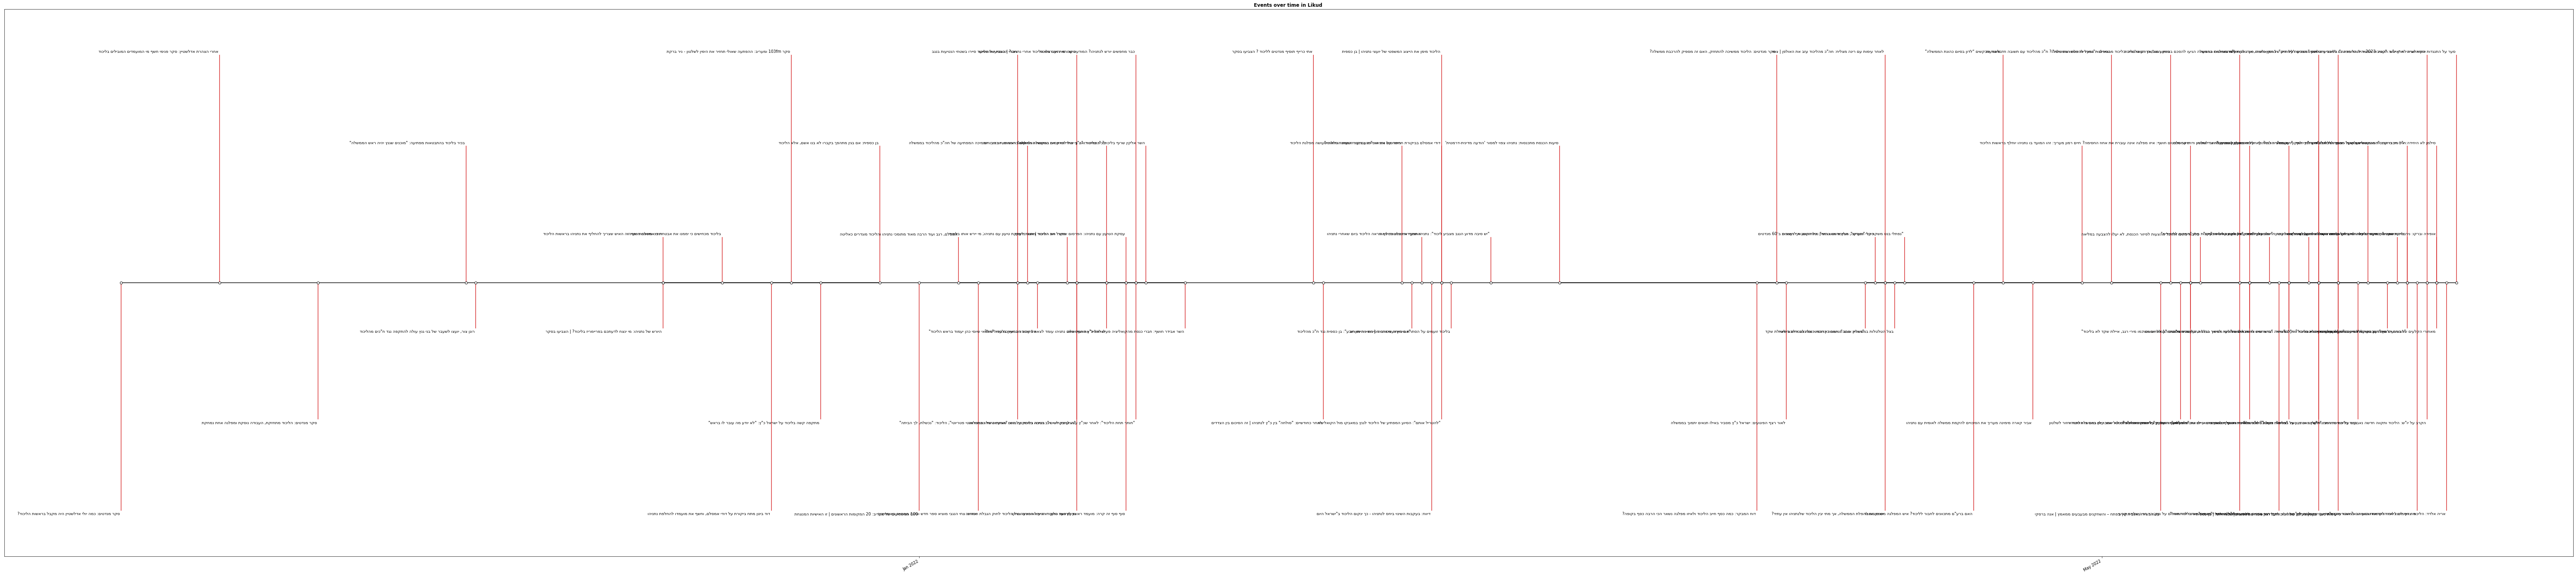

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from bidi.algorithm import get_display

names = list(event_df2['Event'])
new_names = []
for name in names:
  new_names.append(get_display(name))

dates = list(event_df2['Date'])

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(90, 20), constrained_layout=True)
ax.set()
ax.set_title("Events over time in Likud ", fontweight ="bold",loc='center')

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, new_names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)

ax.margins(y=0.1)
plt.show()

Now lets visualize with BerTopic over time

In [ ]:
from bertopic import BERTopic

articals_topic_model = BERTopic(language="multilingual",top_n_words=20, calculate_probabilities=True, verbose=True)
artical_topics, bibi_probs = articals_topic_model.fit_transform(event_df2['Event'])

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2022-07-07 14:39:28,595 - BERTopic - Transformed documents to Embeddings
2022-07-07 14:39:31,311 - BERTopic - Reduced dimensionality
2022-07-07 14:39:31,327 - BERTopic - Clustered reduced embeddings


In [ ]:
import re

articals_df = event_df2
articals_df.Event = articals_df.apply(lambda row: re.sub(r"http\S+", "", row.Event), 1)
articals_df.Event = articals_df.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Event.split())), 1)
timestamps = articals_df.Date.to_list()
tweets = articals_df.Event.to_list()

In [ ]:
artical_topics2, bibi_probs2 = articals_topic_model.fit_transform(tweets)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2022-07-07 14:41:38,402 - BERTopic - Transformed documents to Embeddings
2022-07-07 14:41:41,595 - BERTopic - Reduced dimensionality
2022-07-07 14:41:41,617 - BERTopic - Clustered reduced embeddings


In [ ]:
artical_topics_over_time = articals_topic_model.topics_over_time(tweets, artical_topics2, timestamps, nr_bins=20)

19it [00:00, 138.78it/s]


In [ ]:
articals_topic_model.visualize_topics_over_time(artical_topics_over_time, top_n_topics=26)

## Part 2 - 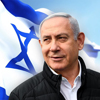
---

Data analysis for the elected Knesset member - Benjamin Netanyahu

### First approach - topic detection in Twitter using BertTopic

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from tqdm import tqdm

# Creating list to append tweet data to
bibi_tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('◊ë◊ô◊ë◊ô ◊†◊™◊†◊ô◊î◊ï since:2022-03-01 until:2022-07-06').get_items())):
    if i>25000:
        break
    bibi_tweets_list.append([tweet.date, tweet.id, tweet.content])

# Creating a dataframe from the tweets list above
bibi_tweets_df = pd.DataFrame(bibi_tweets_list, columns=['Datetime', 'Tweet Id', 'Text'])
bibi_tweets_df = bibi_tweets_df.sort_values(by=['Datetime'])
bibi_tweets_df

14208it [04:39, 50.91it/s]


Datetime             Tweet Id  \
14207 2022-03-01 03:13:20+00:00  1498496580181233669   
14206 2022-03-01 03:38:08+00:00  1498502824044511235   
14205 2022-03-01 04:30:43+00:00  1498516057631375362   
14204 2022-03-01 05:11:58+00:00  1498526437879554049   
14203 2022-03-01 05:12:27+00:00  1498526559669522435   
...                         ...                  ...   
4     2022-07-05 22:08:36+00:00  1544443154077818882   
3     2022-07-05 22:09:26+00:00  1544443361058205697   
2     2022-07-05 22:50:08+00:00  1544453602923651073   
1     2022-07-05 22:53:42+00:00  1544454502669058048   
0     2022-07-05 23:03:59+00:00  1544457091401895937   

                                                    Text  
14207  @netanelgla ◊ë◊ô◊ë◊ô ◊†◊™◊†◊ô◊î◊ï ◊î◊ô◊î ◊î◊û◊ó◊°◊ï◊ù ◊î◊ê◊ó◊®◊ï◊ü ◊ú◊ë◊ô◊ñ...  
14206  @regev_miri ◊ê◊ó◊ú◊î ◊©◊ú ◊í◊ô◊ë◊ï◊ô, ◊®◊ß ◊©◊†◊ô ◊§◊®◊ò◊ô◊ù ◊©◊©◊õ◊ó◊™:...  
14205  @netanyahu ◊û◊ß◊ë◊ú◊ô◊ù ◊ó◊ú◊ó◊ú◊î ◊®◊ß ◊ú◊ó◊©◊ï◊ë ◊û◊î ◊î◊ô◊î ◊ß◊ï◊®◊î ◊ê...  
14204  ◊ë◊ï◊ß◊® ◊ò◊ï◊ë ◊ú◊¢◊ô◊™◊ï◊†◊ê◊ô ◊î◊õ◊ô ◊ï◊™◊ô◊ß ◊ë◊ê◊®◊•.◊ï◊î◊õ◊ô ◊ê◊û◊ô◊ü ◊ë◊û◊ì◊ô...  
14203  @Ahuva1MirnzpJ ◊ï◊ú◊õ◊ü ◊õ◊ú ◊û◊î ◊©◊ß◊©◊ï◊® ◊ë-"◊ë◊ô◊ë◊ô" ◊¢◊ï◊ë◊® ...  
...                                                  ...  
4      #◊ë◊ô◊ë◊ô_◊û◊ú◊ö_◊ô◊©◊®◊ê◊ú_◊ó◊ô_◊ï◊ß◊ô◊ô◊ù #◊©◊®◊î_◊†◊™◊†◊ô◊î◊ï_◊î◊ê◊ô◊©◊î_◊î◊õ◊ô...  
3      @BenCaspit ◊ë◊ü ◊ô◊ß◊®.\n◊ë◊ô◊†◊ô◊†◊ï, ◊î◊®◊ô ◊û◊î ◊©◊û◊® ◊†◊™◊†◊ô◊î◊ï ...  
2      @hasolidit @netanyahu ◊ê◊†◊ô ◊™◊ï◊û◊ö ◊ë◊†◊™◊†◊ô◊î◊ï ◊ï◊û◊°◊õ◊ô◊ù ...  
1      @maltshul @yairlapid @steinitz_yuval ◊ê◊™◊î ◊û◊™◊õ◊ï◊ï...  
0      @zoharm7 ◊î◊ê◊ô◊ì◊ô◊ê◊ï◊ú◊ï◊í◊ô◊î ◊©◊ú◊õ◊ù ◊î◊ô◊ê ◊§◊ô◊ô◊ß, ◊©◊†◊ê◊î ◊ï◊î◊°◊™...  

[14208 rows x 3 columns]

In [ ]:
from bertopic import BERTopic

bibi_topic_model = BERTopic(language="multilingual",top_n_words=20, calculate_probabilities=True, verbose=True)
bibi_topics, bibi_probs = bibi_topic_model.fit_transform(bibi_tweets_df['Text'])

Batches:   0%|          | 0/444 [00:00<?, ?it/s]

2022-07-07 09:39:20,980 - BERTopic - Transformed documents to Embeddings
2022-07-07 09:39:38,411 - BERTopic - Reduced dimensionality
2022-07-07 09:39:51,059 - BERTopic - Clustered reduced embeddings


In [ ]:
bibi_topic_model.get_topic_info()

Topic  Count                                  Name
0       -1   8652                  -1_◊ë◊ô◊ë◊ô_◊†◊™◊†◊ô◊î◊ï_◊ê◊™_◊ú◊ê
1        0    486                   0_◊ê◊™_◊ë◊ô◊ë◊ô_◊ú◊ê_◊†◊™◊†◊ô◊î◊ï
2        1    427                   1_◊ú◊ê_◊†◊™◊†◊ô◊î◊ï_◊ë◊ô◊ë◊ô_◊©◊ú
3        2    299                   2_◊ú◊ê_◊†◊™◊†◊ô◊î◊ï_◊ë◊ô◊ë◊ô_◊©◊ú
4        3    258                   3_◊ë◊ô◊ë◊ô_◊†◊™◊†◊ô◊î◊ï_◊ú◊ê_◊ê◊™
..     ...    ...                                   ...
127    126     10              126_◊û◊û◊û◊©_◊ó◊ú◊ô◊§◊ô_◊ë◊ó◊ô◊†◊ù_◊î◊ê◊í
128    127     10  127_◊¢◊©◊î_◊ï◊ê◊§◊ô◊ú◊ï_arierabinovitch_◊ë◊û◊õ◊†◊î
129    128     10            128_shoot_◊™◊ï◊û◊õ◊ô_◊ú◊©◊¢◊ë◊®_◊ò◊®◊ï◊®
130    129     10              129_◊û◊©◊ß◊®_◊ë◊ó◊®◊™◊ô_◊ë◊í◊•_◊ô◊§◊®◊ï◊©
131    130     10              130_◊î◊û◊ô◊ì◊ï◊™_◊í◊†◊ë◊î_◊î◊®◊ë_◊û◊©◊ó◊ß

[132 rows x 3 columns]

In [ ]:
bibi_topic_model.visualize_topics()


In [ ]:
bibi_topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
bibi_topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [ ]:
bibi_topic_model.visualize_barchart(top_n_topics=25)

In [ ]:
bibi_topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
import re

bibi_tweets2 = bibi_tweets_df
bibi_tweets2.Text = bibi_tweets2.apply(lambda row: re.sub(r"http\S+", "", row.Text), 1)
bibi_tweets2.Text = bibi_tweets2.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Text.split())), 1)
timestamps = bibi_tweets2.Datetime.to_list()
tweets = bibi_tweets2.Text.to_list()

In [ ]:
bibi_topics2, bibi_probs2 = bibi_topic_model.fit_transform(tweets)

Batches:   0%|          | 0/444 [00:00<?, ?it/s]

2022-07-07 09:51:36,455 - BERTopic - Transformed documents to Embeddings
2022-07-07 09:52:00,378 - BERTopic - Reduced dimensionality
2022-07-07 09:52:13,957 - BERTopic - Clustered reduced embeddings


In [ ]:
bibi_topics_over_time = bibi_topic_model.topics_over_time(tweets, bibi_topics2, timestamps, nr_bins=20)

20it [00:06,  2.91it/s]


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=26)

### Seconde approach - scraping news and their analysis

In [ ]:
from GoogleNews import GoogleNews

# The date range is limited to one month because this API is very restrictive
googlenews1 = GoogleNews(lang='he',start='01/06/2022',end='07/07/2022')
googlenews1.get_news('◊ë◊ô◊ë◊ô ◊†◊™◊†◊ô◊î◊ï')
bibi_result = googlenews1.results()

In [ ]:
from dataclasses import dataclass
import pandas as pd
month_name_list =["◊ë◊ì◊¶◊û◊≥",'◊ë◊ô◊†◊ï◊≥','◊ë◊§◊ë◊®◊≥','◊ë◊û◊®◊•','◊ë◊ê◊§◊®◊≥','◊ë◊û◊ê◊ô','◊ë◊ô◊ï◊†◊ô','◊ë◊ê◊ï◊ß◊≥','◊ë◊†◊ï◊ë◊≥']
month_num_list = [12,1,2,3,4,5,6,10,11]

dates = {month_name_list[i]: month_num_list[i] for i in range(len(month_name_list))}
bibi_events_date = []
bibi_events_text = []

for res in bibi_result:
  try:
    event =res['title']
    date = res['date']
    if date:
      date_lst = date.split()
      if len(date_lst) == 2:
        new_date = f"2022-{dates[date_lst[1]]}-{date_lst[0]}"
      elif len(date_lst) == 3:
        new_date = f"2021-{dates[date_lst[1]]}-{date_lst[0]}"
    if date:
      bibi_events_date.append(new_date)
      bibi_events_text.append(event)
  except:
    pass

bibi_event_df2 = pd.DataFrame(list(zip(bibi_events_date, bibi_events_text)),columns =['Date', 'Event'])
bibi_event_df2 = bibi_event_df2.sort_values(by=['Date'])
bibi_event_df2

Date                                              Event
39  2022-6-10  ◊ì◊ë◊® ◊û◊ó◊ñ◊ô◊ï◊†◊ï◊™◊ô◊ï ◊©◊ú ◊†◊™◊†◊ô◊î◊ï ◊ú◊í◊ë◊ô ◊î◊û◊û◊©◊ú◊î ◊ú◊ê ◊î◊™◊í◊©◊ù,...
40  2022-6-10  ◊û◊ß◊ï◊®◊ë◊ô ◊†◊™◊†◊ô◊î◊ï: "◊¢◊ì◊ï◊™ ◊ß◊ú◊ô◊ô◊ü ◊®◊¶◊ï◊§◊î ◊©◊ß◊®◊ô◊ù ◊ë◊ï◊ò◊ô◊ù ◊ï...
50  2022-6-11  ◊ú◊§◊ô◊ì ◊™◊ß◊£ ◊§◊ï◊°◊ò ◊©◊ú ◊†◊™◊†◊ô◊î◊ï: "◊ú◊¶◊ë◊ï◊ò ◊ê◊™ ◊¢◊¶◊û◊ö ◊õ◊ì◊ô ◊ú◊î...
29  2022-6-12       "◊™◊™◊ë◊ô◊ô◊© ◊ï◊™◊™◊†◊¶◊ú" | ◊§◊ï◊°◊ò ◊©◊ú ◊†◊™◊†◊ô◊î◊ï ◊ó◊®◊ö ◊ê◊™ ◊î◊®◊©◊™
49  2022-6-12  ◊î◊ê◊ù ◊†◊™◊†◊ô◊î◊ï ◊î◊†◊ó◊î ◊ê◊™ ◊§◊ô◊ú◊ë◊®? ◊©◊û◊ï◊†◊î ◊†◊ß◊ï◊ì◊ï◊™ ◊ú◊§◊ô◊¶◊ï◊ó ...
48  2022-6-12  ◊ë◊†◊ò ◊î◊¶◊ú◊ô◊ó ◊ú◊î◊§◊ï◊ö ◊ú◊®◊ê◊© ◊û◊û◊©◊ú◊™ ◊î◊®◊ß ◊ú◊ê ◊ë◊ô◊ë◊ô, ◊ê◊ë◊ú ◊ú◊ê...
28  2022-6-12  ◊®◊ê◊© ◊î◊û◊ú"◊ú ◊ú◊©◊¢◊ë◊® ◊û◊¢◊ô◊ì: "◊†◊™◊†◊ô◊î◊ï ◊ú◊ê ◊î◊™◊õ◊ï◊†◊ü ◊ú◊§◊í◊ô◊©◊î...
17  2022-6-13  ◊ë◊†◊ò: "◊î◊ï◊®◊ì◊†◊ï ◊ê◊™ ◊î◊ê◊ë◊ò◊ú◊î ◊ï◊ê◊™ ◊î◊í◊ô◊®◊¢◊ï◊ü"; ◊†◊™◊†◊ô◊î◊ï: "...
44  2022-6-13   ◊†◊™◊†◊ô◊î◊ï ◊¢◊ï◊ß◊•: "◊ñ◊ê◊™ ◊ê◊ó◊™ ◊î◊ú◊ï◊ï◊ô◊ï◊™ ◊î◊ê◊®◊ï◊õ◊ï◊™ ◊ë◊î◊ô◊°◊ò◊ï◊®◊ô◊î"
45  2022-6-13    ◊ú◊ï◊ô◊†◊°◊ï◊ü ◊™◊ï◊ß◊£: "◊†◊™◊†◊ô◊î◊ï ◊ú◊ê ◊†◊î◊†◊™◊ü, ◊î◊ï◊ê ◊ß◊û◊¶◊ü ◊ó◊ï◊ú◊†◊ô"
6   2022-6-15  ◊ú◊ô◊ë◊®◊û◊ü ◊ó◊©◊£ ◊ê◊™ ◊î◊©◊ß◊® ◊©◊ú ◊†◊™◊†◊ô◊î◊ï? "◊õ◊ë◊® ◊ú◊ê ◊û◊ê◊û◊ô◊†◊ô◊ù ◊ú◊ö"
5   2022-6-15  ◊†◊ñ◊ß◊ï ◊î◊í◊ì◊ï◊ú ◊©◊ú ◊†◊™◊†◊ô◊î◊ï: ◊î◊ë◊ô◊ë◊ô◊ñ◊ù ◊©◊ó◊ô◊°◊ú ◊ê◊™ ◊î◊ê◊ë◊ó◊†◊î ...
27  2022-6-15            ◊ë◊ô◊ë◊ô ◊†◊™◊†◊ô◊î◊ï ◊ú◊ê ◊û◊®◊ï◊¶◊î: ◊ë◊†◊ò ◊í◊ï◊†◊ë ◊ú◊ô ◊ß◊®◊ì◊ô◊ò
7   2022-6-19  ◊î◊ß◊®◊ë ◊©◊ú ◊ë◊†◊ô◊û◊ô◊ü ◊†◊™◊†◊ô◊î◊ï ◊î◊ï◊ê ◊ß◊®◊ë ◊ë◊ô◊ü ◊ì◊™ ◊ú◊û◊ì◊ô◊†◊î | ...
31  2022-6-19  ◊ë◊ó◊ô◊®◊ï◊™ 2022: ◊î◊†◊õ◊° ◊î◊ô◊ß◊® ◊ë◊ô◊ï◊™◊® ◊ú◊ê ◊ô◊©◊ó◊ß ◊ú◊ò◊ï◊ë◊™ ◊†◊™◊†...
30  2022-6-19               ◊®◊ê◊© ◊î◊ê◊ï◊§◊ï◊ñ◊ô◊¶◊ô◊î ◊†◊™◊†◊ô◊î◊ï ◊ë◊ë◊©◊ï◊®◊î ◊û◊¢◊†◊ô◊ô◊†◊™
33  2022-6-20      ◊¢◊ô◊û◊ï◊™ ◊§◊ï◊û◊ë◊ô ◊ë◊ô◊ü ◊†◊™◊†◊ô◊î◊ï ◊ú◊ú◊§◊ô◊ì: "◊©◊®◊ú◊ò◊ü"; "◊ó◊®◊§◊î"
46  2022-6-20     ◊†◊™◊†◊ô◊î◊ï ◊¢◊ß◊• ◊ê◊™ ◊î◊ß◊ï◊ê◊ú◊ô◊¶◊ô◊î: ◊¥◊¢◊ú ◊õ◊ú◊ë◊ô◊ù ◊ê◊§◊©◊® ◊ú◊°◊û◊ï◊ö◊¥
24  2022-6-20      ◊†◊™◊†◊ô◊î◊ï ◊ú◊ê◊ï◊®◊ë◊ö: "◊î◊û◊™◊ó◊ô◊ú ◊ë◊û◊¶◊ï◊ï◊î ◊ê◊ï◊û◊®◊ô◊ù ◊ú◊ï ◊í◊û◊ï◊®"
0   2022-6-20  ◊†◊™◊†◊ô◊î◊ï ◊û◊ë◊ò◊ô◊ó: "◊ú◊ê ◊ê◊©◊ë ◊¢◊ù ◊¢◊ë◊ê◊°". ◊©◊®◊ô◊ï◊ü ◊ú◊°◊ô◊ú◊û◊ü? ...
20  2022-6-21           ◊î◊§◊°◊ì ◊î◊©◊§◊ô◊ï◊™, ◊ï◊î◊î◊ó◊û◊¶◊î ◊û◊ê◊ô ◊î◊¢◊ë◊®◊™ ◊ó◊ï◊ß ◊î◊†◊ê◊©◊ù
37  2022-6-21  ◊û◊ô ◊ô◊§◊®◊ï◊©, ◊û◊ô ◊ô◊ó◊ë◊ï◊®? ◊õ◊ú ◊î◊™◊¢◊ú◊ï◊û◊ï◊™ ◊ë◊ì◊®◊ö ◊ú◊ë◊ó◊ô◊®◊ï◊™ 2022
53  2022-6-21      ◊î◊ì◊ô◊ú◊û◊î ◊©◊ú ◊ê◊ô◊ñ◊†◊ß◊ï◊ò ◊ï◊©◊ú ◊õ◊ú ◊§◊ï◊ú◊ô◊ò◊ô◊ß◊ê◊ô ◊ó◊ì◊© - ◊ì◊¢◊ï◊™
35  2022-6-21  ◊ë◊†◊ô◊û◊ô◊ü ◊†◊™◊†◊ô◊î◊ï ◊ë◊ú◊ó◊•? ◊¢◊ú◊ô◊ô◊™ ◊û◊ì◊®◊í◊î ◊û◊©◊û◊¢◊ï◊™◊ô◊™ ◊ë◊í◊ñ◊®◊™...
54  2022-6-21  ◊ú◊ô◊ë◊®◊û◊ü ◊ë◊î◊™◊ô◊ô◊ó◊°◊ï◊™ ◊®◊ê◊©◊ï◊†◊î ◊ú◊ì◊®◊û◊î ◊î◊§◊ï◊ú◊ô◊ò◊ô◊™: "◊ê◊°◊ï◊® ...
55  2022-6-21  ◊î◊ì◊ë◊®◊ô◊ù ◊©◊°◊ô◊§◊®◊î ◊ß◊ú◊ô◊ô◊ü ◊ô◊õ◊ï◊ú◊ô◊ù ◊ú◊î◊ë◊ô◊ê ◊ê◊ì◊ù ◊ú◊ë◊ó◊ô◊ú◊î ◊í◊ù...
38  2022-6-21  "◊ñ◊®◊ô◊ß◊™ ◊î◊û◊ô◊ú◊ô◊ï◊†◊ô◊ù ◊©◊ú ◊ë◊†◊ò ◊ó◊û◊ï◊®◊î ◊¢◊©◊®◊ï◊™ ◊û◊ï◊†◊ô◊ù ◊û◊™◊ô◊ß...
15  2022-6-21                              ◊û◊°◊¢ ◊î◊©◊ß◊® ◊î◊ó◊ì◊© ◊©◊ú ◊ë◊ô◊ë◊ô
52  2022-6-21    ◊†◊™◊†◊ô◊î◊ï, ◊ë◊†◊ò ◊ê◊ï ◊ú◊§◊ô◊ì; ◊û◊ô ◊î◊§◊ï◊ú◊ô◊ò◊ô◊ß◊ê◊ô ◊î◊¢◊©◊ô◊® ◊ë◊ô◊ï◊™◊®?
25  2022-6-21  ◊ë◊ó◊ô◊®◊ï◊™ 2022: ◊†◊™◊†◊ô◊î◊ï ◊û◊™◊õ◊ï◊ï◊ü ◊ú◊®◊ï◊• ◊¢◊ù ◊ß◊û◊§◊ô◊ô◊ü ◊ß◊ì◊†◊¶...
18  2022-6-21  ◊°◊¢◊®: "◊ú◊†◊™◊†◊ô◊î◊ï ◊ú◊ê ◊ô◊î◊ô◊ï 61". ◊õ◊•: "◊ê◊¶◊ô◊¢ ◊©◊î◊ï◊ê ◊ô◊î◊ô◊î...
19  2022-6-21  "◊†◊™◊†◊ô◊î◊ï ◊û◊†◊°◊î ◊ú◊¢◊©◊ï◊™ ◊ì◊ë◊®◊ô◊ù ◊©◊ú ◊ê◊†◊©◊ô◊ù ◊®◊í◊ô◊ú◊ô◊ù", ◊ï◊î◊§...
26  2022-6-22  ◊ú◊§◊ô◊ì ◊§◊™◊ó ◊ê◊™ ◊î◊ß◊û◊§◊ô◊ô◊ü: "◊î◊ê◊ô◊© ◊î◊ó◊ñ◊ß ◊ë◊ê◊ï◊§◊ï◊ñ◊ô◊¶◊ô◊î ◊î◊ï◊ê...
41  2022-6-22  ◊¶◊§◊ï: ◊î◊î◊ï◊ì◊¢◊î ◊î◊ì◊®◊û◊ò◊ô◊™ ◊©◊ô◊ê◊ô◊® ◊†◊™◊†◊ô◊î◊ï ◊©◊ú◊ó ◊ú◊ê◊ë◊ô◊ï ◊¢◊ú ...
3   2022-6-22  ◊ê◊ô◊ô◊ú◊™ ◊©◊ß◊ì: ◊ê◊°◊õ◊ô◊ù ◊ú◊©◊ë◊™ ◊™◊ó◊™ ◊†◊™◊†◊ô◊î◊ï ◊ë◊û◊û◊©◊ú◊î ◊ó◊ú◊ï◊§◊ô◊™...
23  2022-6-22  ◊î◊†◊™◊ï◊†◊ô◊ù ◊û◊®◊ê◊ô◊ù: ◊î◊§◊ô◊ú◊ï◊í ◊ë◊û◊ó◊†◊î ◊î◊¢◊®◊ë◊ô ◊ô◊õ◊ï◊ú ◊ú◊î◊õ◊®◊ô◊¢ ...
22  2022-6-22         ◊ó◊ñ◊®◊™ ◊î◊õ◊ú◊õ◊ú◊î ◊©◊ú ◊†◊™◊†◊ô◊î◊ï ◊™◊°◊õ◊ü ◊ê◊™ ◊î◊û◊©◊ß ◊î◊ô◊©◊®◊ê◊ú◊ô
47  2022-6-22  ◊ú◊û◊®◊ï◊™ ◊î◊û◊©◊ë◊® ◊î◊õ◊ú◊õ◊ú◊ô ◊î◊û◊ó◊®◊ô◊£, ◊î◊§◊ï◊ú◊ô◊ò◊ô◊ß◊ê◊ô◊ù ◊ô◊û◊©◊ô◊õ◊ï ...
4   2022-6-22  ◊õ◊©◊ê◊ô◊© ◊î◊ß◊©◊® ◊ë◊ò◊ú◊§◊ï◊ü ◊î◊ï◊ê ◊î◊ô◊ú◊ì ◊©◊ú◊õ◊ù, ◊ê◊ô◊ö ◊î◊ï◊ê ◊†◊ß◊®◊ê?...
42  2022-6-23        ◊î◊†◊™◊ï◊†◊

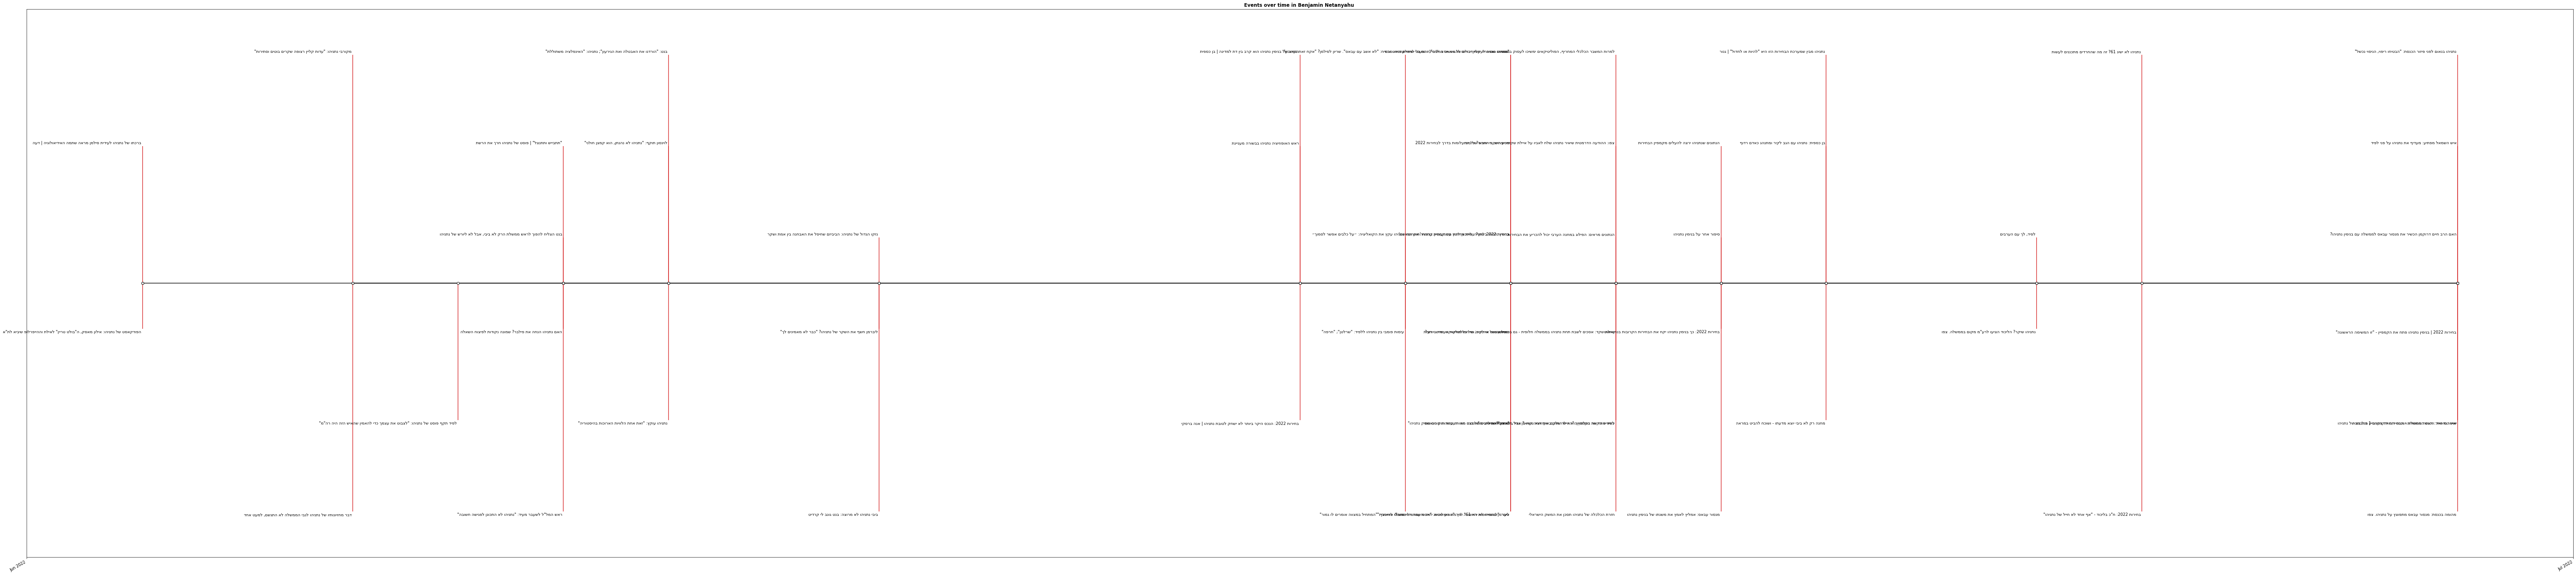

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from bidi.algorithm import get_display

names = list(bibi_event_df2['Event'])
new_names = []
for name in names:
  new_names.append(get_display(name))

dates = list(bibi_event_df2['Date'])

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(90, 20), constrained_layout=True)
ax.set()
ax.set_title("Events over time in Benjamin Netanyahu ", fontweight ="bold",loc='center')

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, new_names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)

ax.margins(y=0.1)
plt.show()

Now lets visualize with BerTopic over time

In [ ]:
from bertopic import BERTopic

bibi_articals_topic_model = BERTopic(language="multilingual",top_n_words=20, calculate_probabilities=True, verbose=True)
bibi_artical_topics, bibi_probs = bibi_articals_topic_model.fit_transform(bibi_event_df2['Event'])

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2022-07-07 15:07:21,774 - BERTopic - Transformed documents to Embeddings
2022-07-07 15:07:24,543 - BERTopic - Reduced dimensionality
2022-07-07 15:07:24,558 - BERTopic - Clustered reduced embeddings


In [ ]:
import re

bibi_articals_df = bibi_event_df2
bibi_articals_df.Event = bibi_articals_df.apply(lambda row: re.sub(r"http\S+", "", row.Event), 1)
bibi_articals_df.Event = bibi_articals_df.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Event.split())), 1)
timestamps = bibi_articals_df.Date.to_list()
tweets = bibi_articals_df.Event.to_list()

In [ ]:
bibi_artical_topics2, bibi_probs2 = bibi_articals_topic_model.fit_transform(tweets)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2022-07-07 15:07:32,525 - BERTopic - Transformed documents to Embeddings
2022-07-07 15:07:35,198 - BERTopic - Reduced dimensionality
2022-07-07 15:07:35,216 - BERTopic - Clustered reduced embeddings


In [ ]:
bibi_artical_topics_over_time = bibi_articals_topic_model.topics_over_time(tweets, bibi_artical_topics2, timestamps, nr_bins=20)

15it [00:00, 132.95it/s]


In [ ]:
bibi_articals_topic_model.visualize_topics_over_time(bibi_artical_topics_over_time, top_n_topics=26)